In [153]:
# BIGRAM APPROACH OF WORD PREDICTION (By predicting next word)

# fetch data fromt he datset consisting of 32K words;

words=open("names.txt",'r').read().splitlines()  # read the contents of a file and split it into a list of lines
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [154]:
b={}
for w in words:
    chrs=['<S>']+ list(w) +['<E']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        bigram=(ch1,ch2)
        b[bigram]=b.get(bigram,0)+1;
b # it basicically give a dictionary of all bigrams and their freq

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,
 ('g

In [155]:
increasing=sorted(b.items(),key=lambda kv:kv[1]) #sorting done by 1st key but here we need on freq so lambda function is used
decreasing=sorted(b.items(),key=lambda kv:-kv[1])
# sorted the bigrams and the frequency from max to min frequecy counts

In [187]:
# for storing this information in 2d array instead of dictionary
# for this we can use tenserflow or pytorch 
# Here doing with pytorch
import torch
N = torch.zeros((27,27),dtype=torch.int32)
chars= sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}  # mapping char to integer
stoi['.']=0

itos={i:s for s,i in stoi.items()} #reverse mapping

for w in words:
    chrs=['.']+ list(w) +['.']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

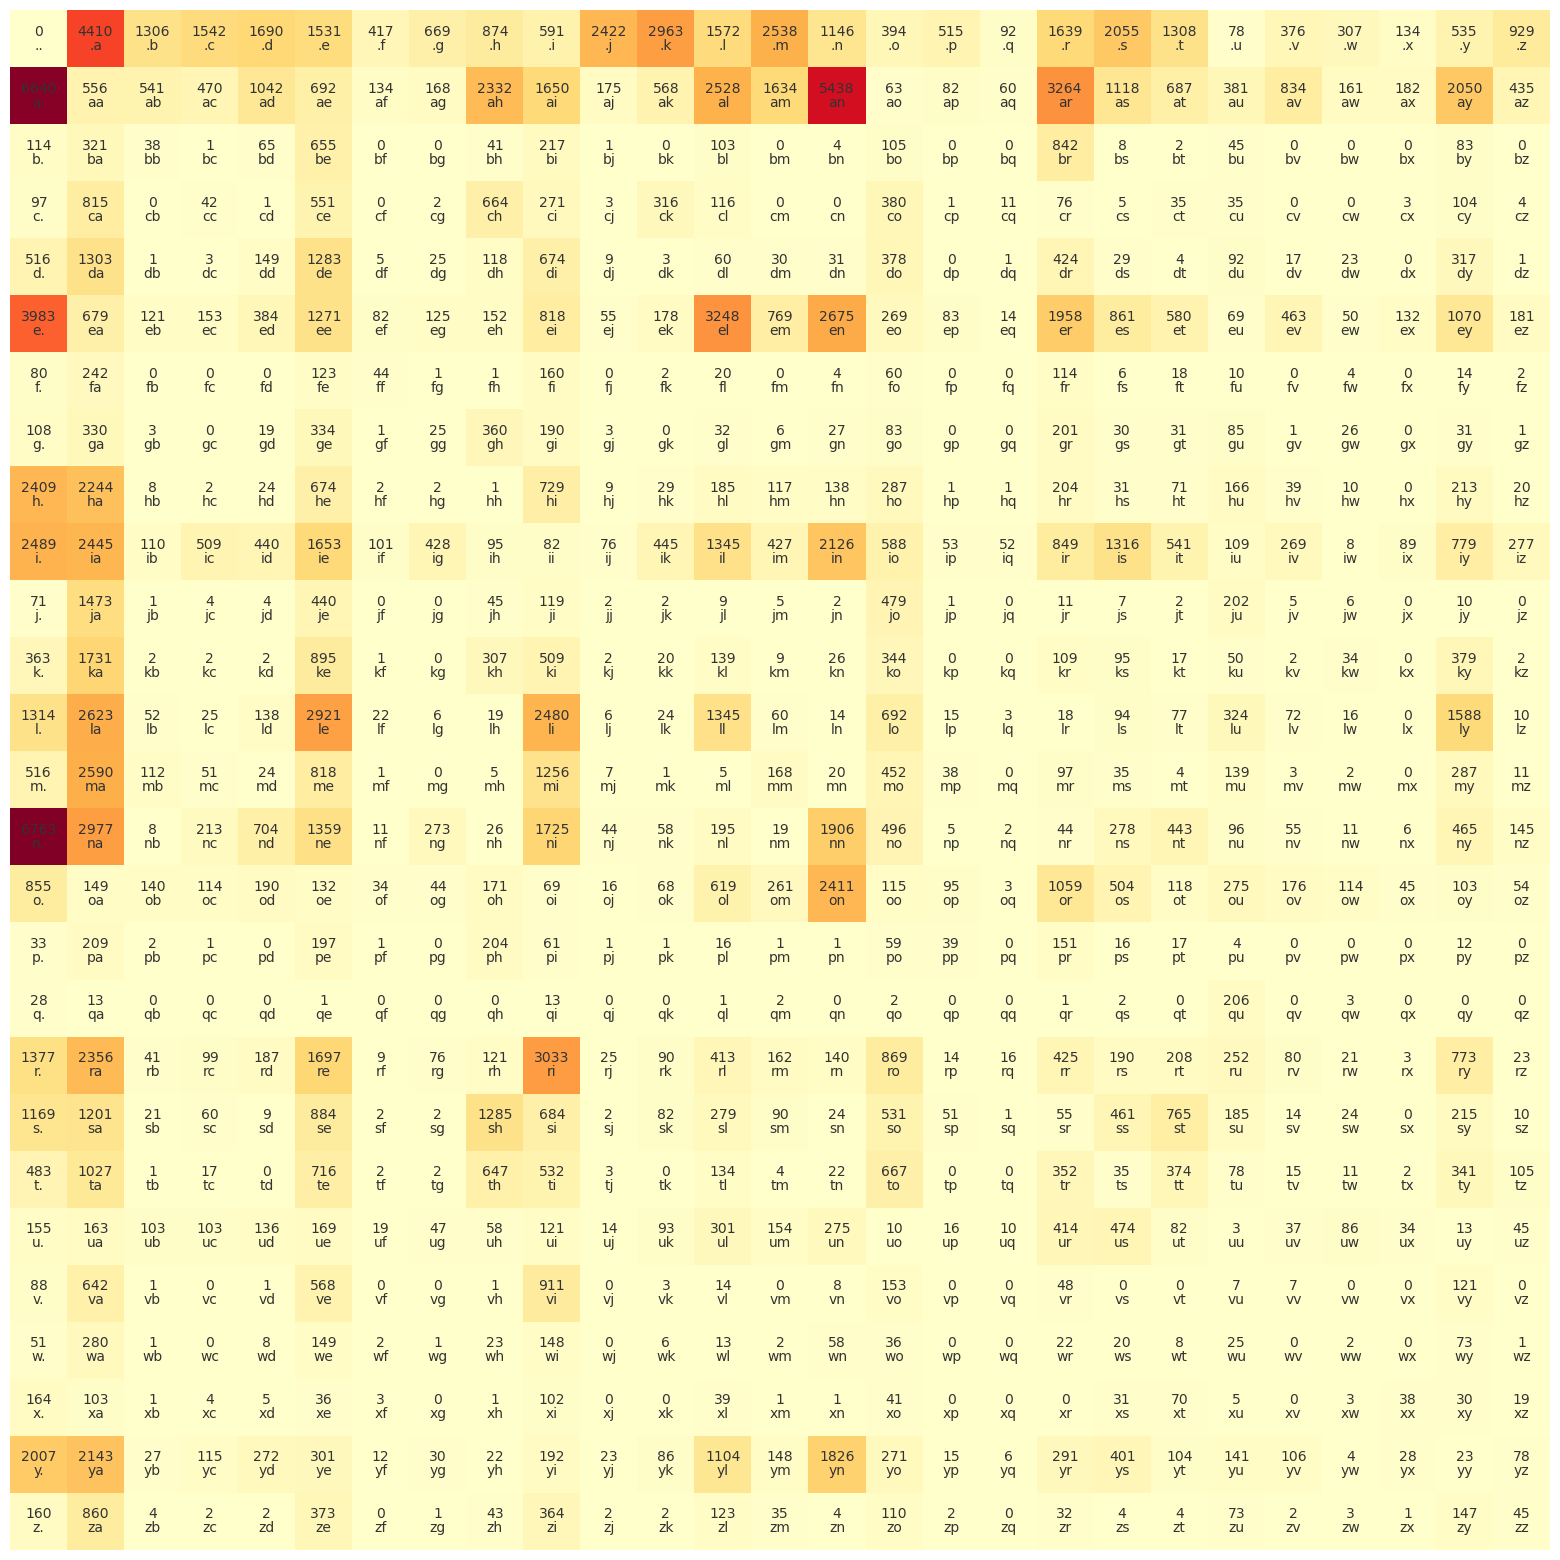

In [157]:
# for showing data N from matplotlib:
# These are actually bigrams with their frequency of occoureces in names of the dataset 'names.txt'
import matplotlib.pyplot as plt
#matplotlib inline
plt.figure(figsize=(20,20))
plt.imshow(N,cmap='YlOrRd')
for i in range(27):
    for j in range(27):
        chrs=itos[i]+itos[j]
        plt.text(j,i,chrs,ha="center",va="top",color="#333333")
        plt.text(j,i,N[i,j].item(), ha="center",va="bottom", color="#333333")
plt.axis('off')
plt.show()

In [158]:
# we want to create freq into probabilities for 1st row
# p= N[0].float()
# p=p/p.sum()

# we now sample from the distribution from TORCH.MULTINOMIAL
# we have a list of probabilities corresponding to each name. These probabilities should sum to 1.
# For simplicity, we can generate random probabilities and normalize them.
p= N[0].float() #p is for 1st row bigram (original)
p= p/p.sum()   #(normalized probabilities)
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [159]:
g= torch.Generator().manual_seed(2147483647)  # using a manual seed function by which we would sample bigrams later
ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() 
# here for only 1 sample we samples one char using index and then converted that index to its character (by itos)
itos[ix]

'c'

In [160]:
# NOW WE GENERATE SOME NEW NAMES FROM OUR MODEL


In [161]:
#1. THESE ARE THE WORDS GENERATED BY UNIFORM MODEL(In which everything equally likely)
g=torch.Generator().manual_seed(2147483647)
for i in range(10):
    out=[]
    ix=0 # jis index s stat krna h jo multinomial se sample hua hai
    while True:
     #p=N[ix].float()
     #p=p/p.sum()
     p=torch.ones(27)/27.0 #this is uniform distrubution which makes everything equally likely and when sample from that it gives us names as
     ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # using feeding function and by sampling model predicts next caharcter
     out.append(itos[ix])
     if ix==0:  # means it's end 
       break;
    print(''.join(out))

cexzm.
zoglkurkicqzktyhwmvmzimjttainrlkfukzkktda.
sfcxvpubjtbhrmgotzx.
iczixqctvujkwptedogkkjemkmmsidguenkbvgynywftbspmhwcivgbvtahlvsu.
dsdxxblnwglhpyiw.
igwnjwrpfdwipkwzkm.
desu.
firmt.
gbiksjbquabsvoth.
kuysxqevhcmrbxmcwyhrrjenvxmvpfkmwmghfvjzxobomysox.


In [162]:
# THESE ARE WORDS PREDICTED BY OUR BIGRAM MODEL

g=torch.Generator().manual_seed(2147483647)
for i in range(10):
    out=[]  #output list
    idx=0   # default index set to 0
    while True:
     p=N[idx].float()
     #print(p)
     p=p/p.sum()
     idx=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() #Sample the next character index using torch.multinomial.
     out.append(itos[idx]) # Append the corresponding character to the output list.
    # print(out)
     if idx==0:  # Stop if the sampled character is . (index 0), indicating the end of the sequence. bcs humne stoi['.']=0 end k lie store kra hua hai
       break;
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [163]:
# AS SEEN BIGRAM MODEL PREDICTS NAME MORE UNIFORMLY THAN UNIFORM MODEL 

In [164]:
# we have 27 possible characters if everything was equally likely then prob musbe be 1/27.0 or 0.037037037037037035 approx(4%)
# anything whose prob is >4% means that we have learnt something
# To summarise these probabilities by single unit/(number) that describes quality of this model ---> this is done by likelihood
# Likelihood = products of probabilities

# Often, the log-likelihood function Log(θ∣x) is maximized instead of the likelihood function itself because it is more computationally convenient and numerically stable.
# upto now we sampled a char and using feeding function we calculated next character 
# now we evaluate the quality of this  model
# GOAL: maximimize likelihood of data wrt model parameters(statistical modelling)
# ie maximizing log likelihood as (bcs log is monotonic) ---> minimizing neative log likelihood--->minimizing average neative log likelihood

# average neative log likelihood= loss function ---> lower it is more is the quality of model
# when all prob are 0 then Log_likelihood can max be 1, when all prob are 1 Log_likelihood is 0 
# when prob are lower Log_likelihood grow more and more negative

In [165]:
Log_likelihood=0;
p = N.float()
p/= p.sum(1,keepdim=True)
n=0;
for w in words:
    chrs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = p[ix1, ix2]
        logprob =torch.log(prob)
        n+=1;
        Log_likelihood+=logprob
        #print(f'{ch1}{ch2}  {"prob="}{prob:.4f}  {"Log prob="}{logprob:.4f}')
        
print(f'{"Log_likelihood ="} {Log_likelihood.item()}') 

Negative_Log_likelihood=-Log_likelihood;  # can be treated as a loss function

print("Negative_Log_likelihood=",Negative_Log_likelihood.item())

print("Average Negative_Log_likelihood=",Negative_Log_likelihood.item()/n)  # average (loss function) quality of model is inversly prop to its (loss function / Negative_Log_likelihood) 

Log_likelihood = -559891.75
Negative_Log_likelihood= 559891.75
Average Negative_Log_likelihood= 2.454094088872915


In [166]:
# NOW we can test that how this model predictin on random data given to it:

In [167]:
Log_likelihood=0;
p = N.float()
p/= p.sum(1,keepdim=True)
n=0;
for w in ["rakshitq"]:    #as iq biagram is not there in N so it will give inf log likelihood for that bigram
    chrs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = p[ix1, ix2]
        logprob =torch.log(prob)
        n+=1;
        Log_likelihood+=logprob
        print(f'{ch1}{ch2}  {"prob="}{prob:.4f}  {"Log prob="}{logprob:.4f}')
        
print(f'{"Log_likelihood ="} {Log_likelihood.item()}') 

Negative_Log_likelihood = -Log_likelihood;  # can be treated as a loss function

print("Negative_Log_likelihood=",Negative_Log_likelihood.item())

print("Average Negative_Log_likelihood=",Negative_Log_likelihood.item()/n) 

.r  prob=0.0512  Log prob=-2.9727
ra  prob=0.1855  Log prob=-1.6846
ak  prob=0.0168  Log prob=-4.0886
ks  prob=0.0188  Log prob=-3.9713
sh  prob=0.1585  Log prob=-1.8418
hi  prob=0.0957  Log prob=-2.3463
it  prob=0.0306  Log prob=-3.4880
tq  prob=0.0000  Log prob=-inf
q.  prob=0.1029  Log prob=-2.2736
Log_likelihood = -inf
Negative_Log_likelihood= inf
Average Negative_Log_likelihood= inf


In [168]:
# As iq biagram is not there in N so it will give inf log likelihood for that bigram

# sometimes certain bigram is not avilable in the dataset for such combination prob=0 and the Log_likelihood tends to infinity as(log0=inf)
# to overcome such cases we do MODEL SMOOTHENING in dataset
# MODEL SMOOTHENING can be done by giving fake counts to the bigrams that have 0 prob of occuring(Known as SOFTMAX)in nueral network
# we can add fake counts as many we want --> 

# more we make model smooth the more will our model will be uniform
# and if we add less fake counts our model  will be more peaked


In [169]:
# Now using fake counts /model smoothning we would get a desired loss function rather than infinity
Log_likelihood=0;
p = (N+1).float()  # done smoothening by giving fake counts to bigrams having 0 occocurence/(prob)
p/= p.sum(1,keepdim=True)
n=0;
for w in ["rakshitq"]:
    chrs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = p[ix1, ix2]
        logprob =torch.log(prob)
        n+=1;
        Log_likelihood+=logprob
        print(f'{ch1}{ch2}  {"prob="}{prob:.4f}  {"Log prob="}{logprob:.4f}')
        
print(f'{"Log_likelihood ="} {Log_likelihood.item()}') 

Negative_Log_likelihood=-Log_likelihood;  # can be treated as a loss function
print("Negative_Log_likelihood=",Negative_Log_likelihood.item())
print("Average Negative_Log_likelihood=",Negative_Log_likelihood.item()/n) 

.r  prob=0.0512  Log prob=-2.9729
ra  prob=0.1852  Log prob=-1.6863
ak  prob=0.0168  Log prob=-4.0876
ks  prob=0.0189  Log prob=-3.9662
sh  prob=0.1581  Log prob=-1.8444
hi  prob=0.0955  Log prob=-2.3485
it  prob=0.0306  Log prob=-3.4876
tq  prob=0.0002  Log prob=-8.6300
q.  prob=0.0970  Log prob=-2.3331
Log_likelihood = -31.35671043395996
Negative_Log_likelihood= 31.35671043395996
Average Negative_Log_likelihood= 3.4840789371066623


In [170]:













# WE will implement the same model using NUERAL NETWORK


######################################### START NUERAL NETWORK HAND ON ####################################################################

# now we use gradient based optimisaton to tune the model using nueral netw
# as we have loss function so we minimize it
xs,ys=[],[]
for w in words[:1]:
    chrs=['.']+ list(w) +['.']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        print(ch1,ch2)
        N[ix1,ix2]+=1
        xs.append(ix1)
        ys.append(ix2)
xs=torch.tensor(xs)     # torch.tensor and torch.Tensor are 2 diffnt func;(use lower case)as it return int
ys=torch.tensor(ys)


. e
e m
m m
m a
a .


In [171]:
xs,ys  # here xs (first char)idx -->(second char)ys (idx)

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [172]:
# F.one_hot Function:This function from the torch.nn.functional module takes a tensor of indices and converts it into a one-hot encoded tensor.
# num_classes=27: This specifies that the one-hot encoded vectors should have 27 classes. Thus, each index in xs will be converted into a one-hot vector of length 27.

# integers are converted int vectors and then these vectors can bee feed into nueral networks
import torch.nn.functional as F
xenc=F.one_hot(xs,num_classes=27).float()
xenc


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

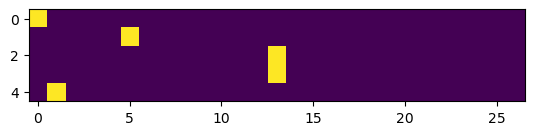

In [173]:
plt.imshow(xenc)


In [174]:
# w=torch.randn((27,1)) # these are wieghts and are multiplied by input
# xenc @ w   # @ is matrix multiplicator in pytorch  as wx+b here with no bias
# here we are seing 5 activations of nueron of 5 inputs(5 inputs fed into the same nueron)
# now instead of 1 nueron we now do for 27 nueron here we are using single layer nueral net with no bias

# w=torch.randn((27,27))
# xenc @ w 

In [175]:
# we make these posistive bcs we want an eqnt to count we have in our bigram model

# logits = xenc @ w     #log-counts

# counts = logits.exp() # equivalent N (of bigram model)
# prob = counts/counts.sum(1,keepdims=True)  # normalise the rows of cnt Matrix to get the probs 
# these above 2 steps are known as SOFTMAX
# probs


In [176]:
# prob[0] # this is basically as my first name is emma and 1st bigram is .e
# so if '.' is passed to the nueral net what are the probabilites of next character is given by prob matrix


In [177]:
# Now for different wieghts or w different prob comes so now we find the optimal value of w

# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch. Generator (). manual_seed (2147483647)
W = torch. randn((27, 27), generator=g)

xenc = F.one_hot(xs, num_classes=27). float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'
nlls=torch.zeros(5)
for i in range(5):
    # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('_________________________________________________ ')
    
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    
  print('input to the neural net :',  x)
    
  print('output probabilities from the neural net:', probs [i]) 
    
  print('label (actual next character ):', y)
    
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log (p)
  print('log likelihood: ', logp.item())
  nll = - logp
  print( 'negative log likelihood:', nll.item ())
  nlls[i]= nll
    
print('==========')
print( 'average negative log likelihood, i.e. loss =', nlls.mean(). item())

_________________________________________________ 
bigram example 1: .e (indexes 0, 5)
input to the neural net : 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character ): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood:  -4.3992743492126465
negative log likelihood: 4.3992743492126465
_________________________________________________ 
bigram example 2: em (indexes 5, 13)
input to the neural net : 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label

In [178]:

##!   OPTIMIZATION
# now we will optimise our w inn order to give pir nuera; net a good prob of occourence of the nueral networkl 
## randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch. Generator (). manual_seed (2147483647)
W = torch. randn((27, 27), generator=g,requires_grad=True)
xenc = F.one_hot(xs, num_classes=27). float() 
logits = xenc @ W 
counts = logits.exp() 
probs = counts / counts.sum(1, keepdims=True)
loss= - probs[torch.arange(5),ys].log().mean()

In [179]:
# probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 13], probs[4, 0] #this is the actual prob of emma name in network
# above can be  wriiten as this
print(loss.item())

3.7693049907684326


In [180]:
# backward pass
W.grad=None
loss.backward() 
# W.grad    # tells influence of a particular wieght to loss function


In [181]:
W.data+= -0.1 * W.grad
# on steps[ increase weight--> backward pass-->encode] and calculate losss will be less


########################################################### END NUERAL HANDS ON ####################################################################

In [182]:
# Putting everything together: for all the words training on nueral network FROM WHAT WE HAVE DEVELOPED FROM RECENT CELLS
########################################################### FINAL NUERAL NETWORK ###########################################################
xs,ys=[],[]
for w in words:
    chrs=['.']+ list(w) +['.']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1
        xs.append(ix1)
        ys.append(ix2)
xs=torch.tensor(xs)     # torch.tensor and torch.Tensor are 2 diffnt func;(use lower case)as it return int
ys=torch.tensor(ys)

num = xs. nelement ()
print( 'number of examples: ', num)

# initialize the 'network'
g = torch. Generator ().manual_seed (2147483647)
W = torch. randn((27, 27), generator=g, requires_grad=True)


number of examples:  228146


In [193]:
#   GRADIENT DESCENT

for k in range (10):
 # forward pass
 xenc   = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
 logits = xenc @ W #predict log counts
 counts = logits.exp()  # counts eqnt to N
 probs  = counts / counts.sum(1, keepdims=True) # probabilities for next character
 regularization = 0.1*(W**2).mean()   # strength of regularization here is0.01 and esqn to cnt increse in N matrix to avoid 0 cnt case in bigram approach
 loss   = -probs [torch.arange(num), ys].log().mean() +regularization
 print(loss.item())
    
  # backward pass
 W.grad = None # set to zero the gradient
 loss. backward ()
    
# update
 W.data += -50 * W.grad

2.5863778591156006
2.5863776206970215
2.586376905441284
2.586376667022705
2.586376190185547
2.5863757133483887
2.5863752365112305
2.5863752365112305
2.5863747596740723
2.586374521255493


In [189]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        xenc  = F.one_hot(torch.tensor([ix]), num_classes=27).float()        # One-hot encode the current index `ix;
        logits= xenc @ W
        counts = logits.exp()  # Replace `some_matrix` with the appropriate tensor
        p = counts / counts.sum(1, keepdim=True)  # Normalize to get probabilities

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # Sample the next character index based on the probabilities
        out.append(itos[ix])  # Append the character corresponding to `ix` to the output
    
        if ix == 0: break    # Break the loop if the end-of-sequence token is reached

    # Print the generated sequence
    print(''.join(out))

dexzmalegllusailezktxha.
kllimittain.
lgfukzka.
da.
st.
zvpucjwthrigmtop.
mbliellavugkwpteda.
ka.
erda.
sadgu.


In [ ]:
# WE HAVE SAMPLED 10 NAMES FROM THE MODEL FOR MORE WE CAN INCREASE THE WORDS PREDICTION IN RANGE